In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Ejercicio 1

Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de características del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro parámetros de evaluación de la calidad con el nivel objetivo. Las variables son: Media, Varianza, Desviación estándar, Asimetría, Kurtosis, Contraste, Energía, ASM (segundo momento angular), Entropía, Homogeneidad, Disimilitud, Correlación, Grosor, PSNR (Pico de la relación señal-ruido), SSIM (Índice de Similitud Estructurada), MSE (Mean Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).

## Ejercicio 1.1

Cargue la tabla de datos tumores.csv y genere usando la función train_test_split(createDataPartition(…) en R) del paquete sklearn.model_selection la tabla de testing con una 25 % de los datos y con el resto de los datos genere una tabla de aprendizaje.

In [3]:
datos_tumores = pd.read_csv('tumores.csv', sep = ",", decimal =".", index_col=0)

print(datos_tumores.dtypes)

#convertir columna tipo a categorica
datos_tumores['tipo'] = datos_tumores['tipo'].astype('category')

dimesiones = datos_tumores.shape
print(dimesiones)

print(datos_tumores.dtypes)

media                  float64
varianza               float64
desviacion.estandar    float64
entropia               float64
asimetria              float64
kurtosis               float64
contraste              float64
energia                float64
asm                    float64
homogeneidad           float64
disiminitud            float64
correlacion            float64
psnr                   float64
ssim                   float64
mse                    float64
dc                     float64
tipo                     int64
dtype: object
(1275, 17)
media                   float64
varianza                float64
desviacion.estandar     float64
entropia                float64
asimetria               float64
kurtosis                float64
contraste               float64
energia                 float64
asm                     float64
homogeneidad            float64
disiminitud             float64
correlacion             float64
psnr                    float64
ssim                    float64


**Nota**: Si el conjunto de datos tiene una columna objetivo, puedes estratificar para garantizar que las proporciones de las clases se mantengan iguales en los conjuntos de entrenamiento y prueba.

In [8]:
#dividimos datos: 75% entrenamiento y 25% testing

train, test = train_test_split(
    datos_tumores,
    test_size=0.25,
    stratify=datos_tumores['tipo'],
    random_state=42)

# Mostrar el tamaño de los conjuntos
print(f"Datos totales: {len(datos_tumores)}")
print(f"Conjunto de entrenamiento: {len(train)}")
print(f"Conjunto de prueba: {len(test)}")

Datos totales: 1275
Conjunto de entrenamiento: 956
Conjunto de prueba: 319


##Ejercicio 1.2
Usando árboles de Decisión genere un modelo predictivo para la tabla de aprendizaje. Modifique los parámetros del árbol de decisión para lograr los mejores resultados posibles. Grafique el árbol obtenido.

In [14]:
X_train = train.drop(columns=['tipo']) #variables predictoras
y_train = train['tipo'] #variable objetivo

X_test = test.drop(columns=['tipo'])
y_test = test['tipo']

#crear y entrenar modelo
tree_model = DecisionTreeClassifier(
    criterion = 'gini', #alternativa: 'entropy'
    max_depth=3,
    min_samples_leaf=10,
    random_state=42
)

tree_model.fit(X_train, y_train)

#predicion y evaluacion
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.987460815047022
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        24
           1       1.00      0.99      0.99       295

    accuracy                           0.99       319
   macro avg       0.94      0.97      0.96       319
weighted avg       0.99      0.99      0.99       319



####Reporte por Clase


El reporte de clasificación está dividido por clases (0 y 1 en este caso), mostrando métricas clave para cada una:

**Class 0 **(Clase Minoritaria):

- Precisión (88%): De las veces que el modelo dijo que algo era de la Clase 0, acertó en el 88% de los casos.

- Recall (96%): De todos los ejemplos que realmente eran Clase 0, el modelo identificó correctamente el 96%.

- F1-Score (92%): Combina precisión y recall para mostrar un balance general en esta clase.

- Support (24): Había 24 ejemplos reales de Clase 0 en los datos.


**Class 1** (Clase Mayoritaria):
- Precisión (100%): Cada vez que el modelo predijo Clase 1, acertó en el 100% de los casos.

- Recall (99%): El modelo encontró correctamente el 99% de los ejemplos que realmente eran Clase 1.

- F1-Score (99%): Indica que el modelo tiene un excelente balance entre precisión y recall.

- Support (295): Había 295 ejemplos reales de Clase 1 en los datos.


**Interpretación**

Clase 0 (Minoritaria):

Aunque tiene menor precisión, el recall alto (96%) asegura que el modelo identifica la mayoría de los ejemplos de esta clase.

Clase 1 (Mayoritaria):

Excelente desempeño con precisión y recall casi perfectos.

Desempeño Global: El modelo funciona excepcionalmente bien, con una precisión general del 98.7% y balance adecuado entre las clases.


In [13]:
# Definir rango de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=123),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}


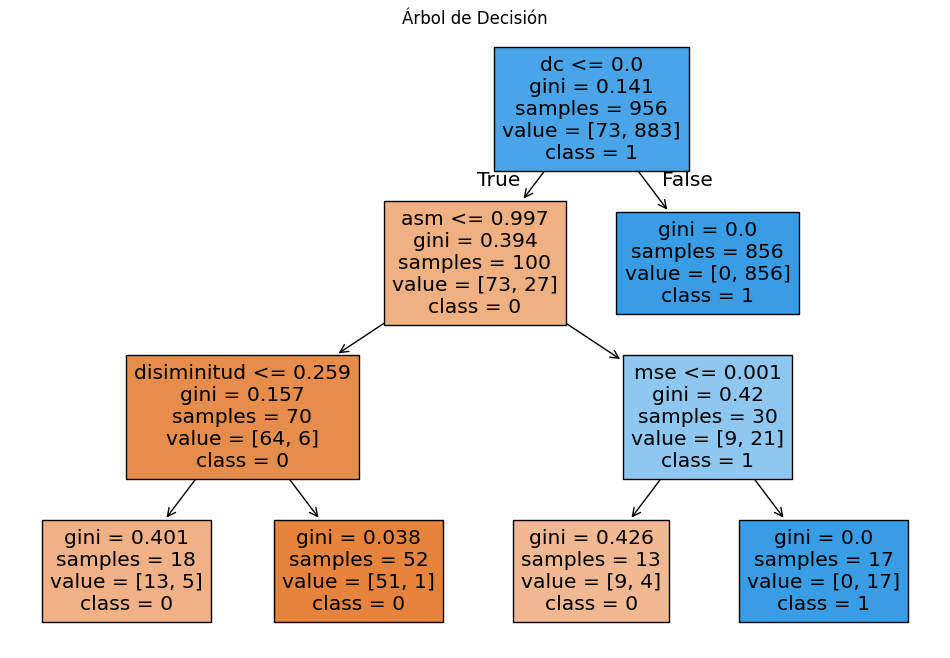

In [16]:
#Visualizar arbol
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X_train.columns,
          class_names=[str(c) for c in tree_model.classes_]) # Convert class names to strings
plt.title('Árbol de Decisión') # Corrected the function name from tittles to title
plt.show()

Nodos Internos (Rectángulos Azules y Naranjas): Cada nodo interno representa una condición que divide los datos en dos grupos (rama izquierda y rama derecha).
Por ejemplo:

dc <= 0.0: Esta es la condición de división en el nodo raíz.
asm <= 0.997: Esta es otra condición en un nodo más abajo.

- Gini: El índice de Gini mide la pureza de los nodos:

Gini = 0 significa que el nodo es "puro", es decir, todos los datos en ese nodo pertenecen a una sola clase.
Un valor de Gini mayor a 0 indica que hay datos de más de una clase.

- Samples: Indica cuántos ejemplos están en el nodo actual.

- Value: Muestra la cantidad de ejemplos de cada clase en el nodo.
value = [73, 883]: Hay 73 ejemplos de la Clase 0 y 883 de la Clase 1.

- Class: Indica la clase predominante en el nodo (la que tiene más ejemplos).

En el nodo raíz, la clase predominante es la Clase 1 (class = 1).
En el nodo naranja, la Clase 0 es predominante (class = 0).

- Ramas:

  - True (izquierda): Si la condición se cumple.
  - False (derecha): Si la condición no se cumple.



#Ejercicio 2

Esta pregunta utiliza los datos sobre la conocida historia y tragedia del Titanic, usando los datos titanicV2020.csv de los pasajeros se trata de predecir la supervivencia o no de un pasajero. La tabla contiene 12 variables y 1309 observaciones, las variables son:

PassegerId: El código de identificación del pasajero (valor único).
Survived: Variable a predecir, 1 (el pasajero sobrevivió) 0 (el pasajero no sobrevivió).
Pclass: En que clase viajaba el pasajero (1 = primera, 2 = segunda , 3 = tercera).
Name: Nombre del pasajero (valor único).
Sex: Sexo del pasajero.
Age: Edad del pasajero.
SibSp: Cantidad de hermanos o cónyuges a bordo del Titanic.
Parch: Cantidad de padres o hijos a bordo del Titanic.
Ticket: Número de tiquete (valor único).
Fare: Tarifa del pasajero.
Cabin: Número de cabina (valor único).
Embarked: Puerto donde embarco el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).

##Ejercicio 2.1

Cargue la tabla de datos titanicV2020.csv, asegúrese re-codificar las variables cualitativas y de ignorar variables que no se deben usar.

In [21]:
datos_titanic = pd.read_csv('titanicV2020.csv', header=0, sep = ",", decimal =".", index_col=0)
print(datos_titanic.dtypes)

#convertir columna tipo a categorica
datos_titanic['Survived'] = datos_titanic['Survived'].astype('category')

# Convertir 'Pclass' en un tipo de datos categórico ordenado
datos_titanic['Pclass'] = pd.Categorical(datos_titanic['Pclass'], ordered=True)

# Eliminar columnas no deseadas ('Name', 'Ticket', 'Cabin')
datos_titanic = datos_titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

# Eliminar filas con valores faltantes
datos_titanic = datos_titanic.dropna()

# Mostrar la estructura del DataFrame
print(datos_titanic.info())


dimesiones = datos_titanic.shape
print(dimesiones)
print(datos_titanic.dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 1043 entries, 1 to 1307
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1043 non-null   category
 1   Pclass    1043 non-null   category
 2   Sex       1043 non-null   object  
 3   Age       1043 non-null   float64 
 4   SibSp     1043 non-null   int64   
 5   Parch     1043 non-null   int64   
 6   Fare      1043 non-null   float64 
 7   Embarked  1043 non-null   object  
dtypes: category(2), float64(2), int64(2), object(2)
memory usage: 59.3+ KB
None
(1043, 8)
Survived    category
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype:

##Ejercicio 2.2
Genere al azar una tabla aprendizaje con un 80 % de los datos y con el resto de los datos genere una tabla de aprendizaje.

In [22]:
train, test = train_test_split(
    datos_titanic,
    test_size=0.2,
    stratify=datos_titanic['Survived'],
    random_state=42
)

# Mostrar el tamaño de los conjuntos
print(f"Datos totales: {len(datos_titanic)}")
print(f"Conjunto de entrenamiento: {len(train)}")
print(f"Conjunto de prueba: {len(test)}")

Datos totales: 1043
Conjunto de entrenamiento: 834
Conjunto de prueba: 209


##Ejercicio 2.3
Usando árboles de Decisión genere un modelo predictivo para la tabla de aprendizaje. Modifique los parámetros del árbol de decisión para lograr los mejores resultados posibles. Grafique el árbol obtenido.

In [27]:
X_train = train.drop(columns=['Survived']) #variables predictoras
y_train = train['Survived'] #variable objetivo

X_test = test.drop(columns=['Survived'])
y_test = test['Survived']

X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)

#crear y entrenar modelo
tree_model_2 = DecisionTreeClassifier(
    criterion = 'gini', #alternativa: 'entropy'
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

tree_model_2.fit(X_train, y_train)

#predicion y evaluacion
y_pred = tree_model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       126
           1       0.84      0.75      0.79        83

    accuracy                           0.84       209
   macro avg       0.84      0.83      0.83       209
weighted avg       0.84      0.84      0.84       209



In [26]:
# Definir rango de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=123),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}


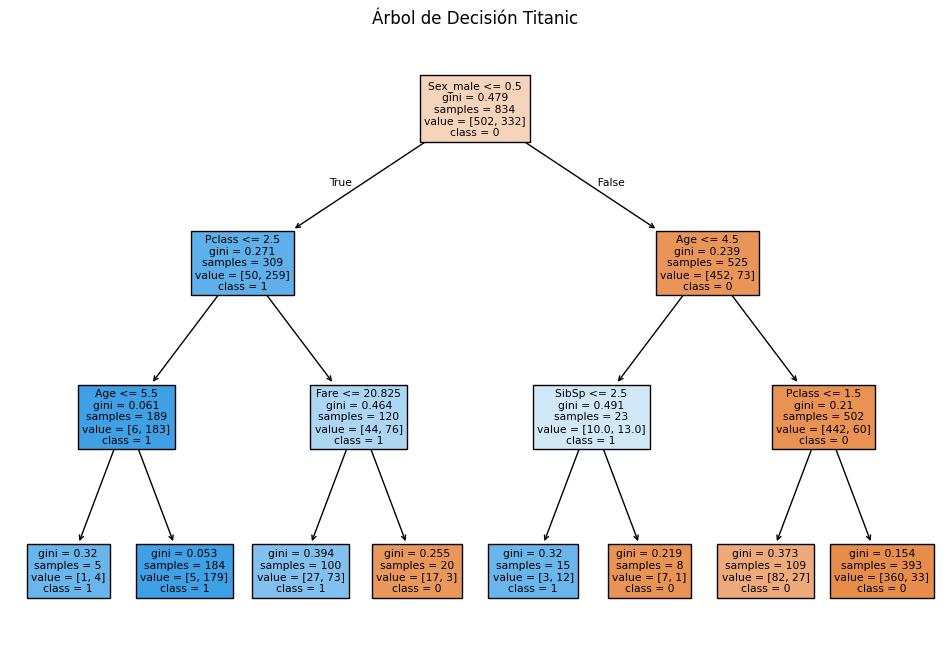

In [28]:
#Visualizar arbol
plt.figure(figsize=(12, 8))
plot_tree(tree_model_2, filled=True, feature_names=X_train.columns,
          class_names=[str(c) for c in tree_model.classes_]) # Convert class names to strings
plt.title('Árbol de Decisión Titanic') # Corrected the function name from tittles to title
plt.show()

#Ejercicio 3
En este ejercicio vamos a predecir números escritos a mano (Hand Written Digit Recognition), la tabla de de datos está en el archivo ZipData 2020.csv.

##Ejercicio 3.1
Cargue la tabla de datos ZipData 2020.csv en R.

In [32]:
datos_numeros = pd.read_csv('ZipData_2020.csv', header=0, sep = ";", decimal =".")
print(datos_numeros.dtypes)

Numero     object
V2        float64
V3        float64
V4        float64
V5        float64
           ...   
V253      float64
V254      float64
V255      float64
V256      float64
V257      float64
Length: 257, dtype: object


##Ejercicio 3.2
Use el método de Arboles de Decisión con el método y los parámetros que usted considere más conveniente para generar un modelo predictivo para la tabla ZipData 2020.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing, luego calcule para los datos de testing la matriz de confusión, la precisión global y la precisión para cada una de las categorías. ¿Son buenos los resultados? Explique

In [33]:
train, test = train_test_split(
    datos_numeros,
    test_size=0.2,
    stratify=datos_numeros['Numero'],
    random_state=42
)


# Mostrar el tamaño de los conjuntos
print(f"Datos totales: {len(datos_numeros)}")
print(f"Conjunto de entrenamiento: {len(train)}")
print(f"Conjunto de prueba: {len(test)}")

Datos totales: 9298
Conjunto de entrenamiento: 7438
Conjunto de prueba: 1860


In [38]:
X_train_numero = train.drop(columns=['Numero']) #variables predictoras
y_train_numero = train['Numero'] #variable objetivo

X_test_numero = test.drop(columns=['Numero'])
y_test_numero = test['Numero']

#crear y entrenar modelo
tree_model_numero = DecisionTreeClassifier(
    criterion = 'entropy', #alternativa: 'gini'
    max_depth=None,
    min_samples_leaf=5,
    random_state=42
)

tree_model_numero.fit(X_train_numero, y_train_numero)

#predicion y evaluacion
y_pred = tree_model_numero.predict(X_test_numero)
accuracy = accuracy_score(y_test_numero, y_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix(y_test_numero, y_pred)
print(classification_report(y_test_numero, y_pred))

Accuracy: 0.8693548387096774
              precision    recall  f1-score   support

        cero       0.93      0.95      0.94       311
       cinco       0.75      0.77      0.76       143
      cuatro       0.83      0.81      0.82       170
         dos       0.87      0.84      0.85       186
       nueve       0.87      0.90      0.88       164
        ocho       0.79      0.82      0.80       142
        seis       0.89      0.81      0.85       167
       siete       0.88      0.87      0.87       158
        tres       0.80      0.80      0.80       165
         uno       0.97      0.98      0.97       254

    accuracy                           0.87      1860
   macro avg       0.86      0.85      0.86      1860
weighted avg       0.87      0.87      0.87      1860



In [37]:
# Definir rango de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=123),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(X_train_numero, y_train_numero)

# Mejor modelo
best_tree = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5}
